# Simple Harmonic Motion

In this notebook, you will learn how to calculate the mean and standard deviation of a row of trials in a data set, graph the data and do a linear curve fit to the data using Python. Using a programming language to read and analyze data is a technique you will use throughout your career as a scientist. (This is a *premier life skill* in science.)

We are using a Google app called Colaboratory, or Colab for short. Google colab reads a Jupyter notebook file that has formatted text and runnable Python code in text and code cells, respectively.

# Save to Google Drive

Before continuing, click the icon in the toolbar to `Copy to Drive`. This will copy the notebook to your Google Drive and will save it automatically as you work on it. **If you do not do this, then you will lose your work when closing the tab.**

# Running Code in Colab

To run a code cell in Google Colab, press `shift-enter` on your keyboard. (In other words, while holding down the `shift` key, press the `enter` or `return` key.) In fact, pressing shift-enter is one way to move downward, cell by cell through the notebook, running one code cell at a time.

Start by clicking on the next code cell to import packages and pressing `shift-enter` on your keyboard. An icon will show you when the code in the cell finishes running. Then continue reading (and sometimes editing) and pressing `shift-enter` for each subsequent cell in the notebook.

# Import Packages

In [14]:
import pandas as pd #used for reading and processing data
import numpy as np #used for arrays
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert a string to a pandas dataframe
from IPython.display import YouTubeVideo #used to embed a YouTube video

# Part 2: Period as a Function of Amplitude

If your first experiment, you measured period as a function of amplitude. You repeated each trial three times. Enter your data for the amplitude and the period for each trial in the code cell below. In first line, after the triple quotes, you will see the names of the columns, which are shown here as a reference.

Trial 1: A (m) | Trial 1: T (s) | Trial 2: A (m) | Trial 2: T (s) | Trial 3: A (m) | Trial 3: T (s)
--- | --- | --- | --- | --- | ---
 | | | | | |

The data should be separated by commas. The rows of data in the cell below are shown as an example. You should replace those rows with your data and add new rows as necessary.

In [15]:
data = StringIO("""Trial 1: A (m),Trial 1: T (s),Trial 2: A (m),Trial 2: T (s),Trial 3: A (m),Trial 3: T (s)
0.1,0.5,0.105,0.52,0.095,0.48
0.2,0.5,0.205,0.51,0.195,0.49
0.3,0.5,0.305,0.54,0.295,0.46
""") 

Read the data into a *dataframe* and print the dataframe. (For large data sets, you would not want to print all of the rows of data.)

In [16]:
# read the data into a pandas dataframe
df = pd.read_csv(data, sep=',')
print(df)

   Trial 1: A (m)  Trial 1: T (s)  Trial 2: A (m)  Trial 2: T (s)  \
0             0.1             0.5           0.105            0.52   
1             0.2             0.5           0.205            0.51   
2             0.3             0.5           0.305            0.54   

   Trial 3: A (m)  Trial 3: T (s)  
0           0.095            0.48  
1           0.195            0.49  
2           0.295            0.46  


## Create Columns for Mean and Standard Deviation

Run the program below to create four new columns for:

- mean amplitude of the three trials
- standard deviation of the mean amplitude
- mean period of the three trials
- standard deviation of the mean period

To calculate the mean of columns of data, we will use the syntax `df.mean(axis="columns")` where `df` is the dataframe object containing the data. The argument `axis="column"` tells the function to find the mean of values in the same row (i.e. across columns). Likewise, the `df.std()` function calculates the standard deviation of the mean.

Note that a particular column in the dataframe is referred to by column name. The mean amplitude column, std. amplitude column, mean period column, and std. period column are all given variables names: `Amean`, `Astd`, `Tmean`, and `Tstd`, respectively, so we can easily refer to these columns when graphing.

In [17]:
# create a column for the mean amplitude
df["Amean (m)"] = df[["Trial 1: A (m)", "Trial 2: A (m)", "Trial 3: A (m)"]].mean(axis="columns")
Amean = df["Amean (m)"]

# create a column for the standard deviation of the mean amplitude
df["Astd (m)"] = df[["Trial 1: A (m)", "Trial 2: A (m)", "Trial 3: A (m)"]].std(axis="columns")
Astd = df["Astd (m)"]

#create a column for the mean period
df["Tmean (s)"] = df[["Trial 1: T (s)", "Trial 2: T (s)", "Trial 3: T (s)"]].mean(axis="columns")
Tmean = df["Tmean (s)"]

#create a column for the standard deviation of the mean period
df["Tstd (s)"] = df[["Trial 1: T (s)", "Trial 2: T (s)", "Trial 3: T (s)"]].std(axis="columns")
Tstd = df["Tstd (s)"]

print(df)

   Trial 1: A (m)  Trial 1: T (s)  Trial 2: A (m)  Trial 2: T (s)  \
0             0.1             0.5           0.105            0.52   
1             0.2             0.5           0.205            0.51   
2             0.3             0.5           0.305            0.54   

   Trial 3: A (m)  Trial 3: T (s)  Amean (m)  Astd (m)  Tmean (s)  Tstd (s)  
0           0.095            0.48        0.1     0.005        0.5      0.02  
1           0.195            0.49        0.2     0.005        0.5      0.01  
2           0.295            0.46        0.3     0.005        0.5      0.04  


## Plot Mean Period vs. Amplitude

The code below plots the mean period vs. amplitude, using the standard deviation of the period for the error bars.

**You should edit the code to add descriptive text for the title and axis labels.**

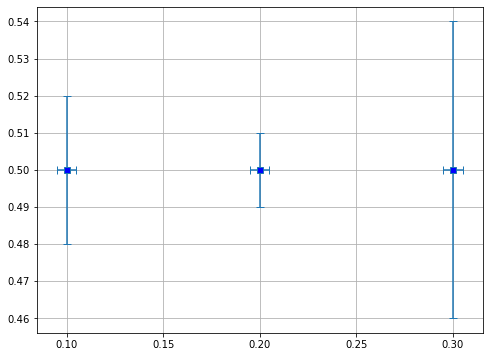

In [18]:
# plot data
fig = plt.figure(figsize=(8,6))
plt.title("")
plt.xlabel('')
plt.ylabel('')
plt.errorbar(Amean, Tmean, xerr=Astd, yerr=Tstd, marker='s', markerfacecolor='blue', markersize=6, capsize=4, ls='none')
plt.grid(which='both', axis='both')
plt.show()

## Analysis

Examine the graph of period vs. amplitude above. 

1. What do you notice about the graph? Is it linear or non-linear? Or is there no relationship between the variables?
2. What can you conclude regarding how period depends on amplitude?

## Exercise

If you increase the amplitude of a mass-spring oscillator, what happens to the period? (Does it increase, decrease, or remain the same?)

**This is a very important observation about a mass-spring oscillator.**

# Part 3: Period as a Function of Mass

**Our goal is to determine the stiffness $k_s$ of the spring using a curve-fit.** The relationship is

$$T = 2\pi \sqrt{\frac{m}{k_s}}$$

You measured period (for multiple trials) for various masses oscillating on the spring. Enter your data into the code cell below. The column headings are:

m (kg) | Trial 1: T (s) | Trial 2: T (s) | Trial 3: T (s)
--- | --- | --- | ---
 | | |

In [19]:
data = StringIO("""m (kg),unc. m (kg),Trial 1: T (s),Trial 2: T (s),Trial 3: T (s)
0.1,0.001,0.5,0.52,0.48
0.2,0.001,0.7,0.71,0.69
0.3,0.001,0.87,0.84,0.90
""")

# read the data into a pandas dataframe
df = pd.read_csv(data, sep=',')
print(df)

   m (kg)  unc. m (kg)  Trial 1: T (s)  Trial 2: T (s)  Trial 3: T (s)
0     0.1        0.001            0.50            0.52            0.48
1     0.2        0.001            0.70            0.71            0.69
2     0.3        0.001            0.87            0.84            0.90


Calculate the mean and standard deviation of the period.

In [20]:
# masses
m = df["m (kg)"]
uncm = df["unc. m (kg)"]

#create a column for the mean period
df["Tmean (s)"] = df[["Trial 1: T (s)", "Trial 2: T (s)", "Trial 3: T (s)"]].mean(axis="columns")
Tmean = df["Tmean (s)"]

#create a column for the standard deviation of the mean
df["Tstd (s)"] = df[["Trial 1: T (s)", "Trial 2: T (s)", "Trial 3: T (s)"]].std(axis="columns")
Tstd = df["Tstd (s)"]

print(df)

   m (kg)  unc. m (kg)  Trial 1: T (s)  Trial 2: T (s)  Trial 3: T (s)  \
0     0.1        0.001            0.50            0.52            0.48   
1     0.2        0.001            0.70            0.71            0.69   
2     0.3        0.001            0.87            0.84            0.90   

   Tmean (s)  Tstd (s)  
0       0.50      0.02  
1       0.70      0.01  
2       0.87      0.03  


## Plot Mean Period vs. Mass

Copy and paste code from above and change whatever is necessary to plot the mean period vs. mass of the oscillator. 

Note that the variables are named `Tmean` and `m` in the code cell above. The `xerr` represents the horizontal error bars and should be the variable `uncm`. The `yerr` represents the vertical error bars and should be the variable `Tstd`.

## Analyze the Graph

Answer the questions below.

1. Examine the graph of the mean period vs. mass. Does the relationship between period and mass seem to be linear or non-linear?

2. The relationship between period and mass is derived from the Momentum Principle to be:
  
  $$T = 2\pi \sqrt{\frac{m}{k_s}}$$

  We can see from this theoretical relationship that $T$ is proportional to $\sqrt{m}$. Let's write the proportionality in the form $T = a\sqrt{m}$ where $a$ represents the *proportionality constant*.

  $$T = \frac{2\pi}{\sqrt{k_s}}\sqrt{m}$$
  
  What is the constant $a$ in terms of $k_s$?
  
3. If you plot $T$ on the vertical axis and $\sqrt{m}$ on the horizontal axis, theory predicts that the plot will be a straight line since they are proportional. What will the slope be equal to?

Copy the code for the graph above, paste it into the cell below, and change whatever is necessary to plot the mean period vs. square root of the mass. 

**Note:** The variable `m` represents the column of mass values. If you want to take the square root of the mass values, use the `numpy` square root function, like this:

```
np.sqrt(m)
```

## Do a linear fit

The numpy `polyfit(x,y,degree)` function takes data for the independent variable `x` and dependent variable `y` (in that order) and returns a polynomial of the `degree` we want. The degree corresponds to the highest exponent of the independent variable. For example here are functions of degree 1, degree 2, and degree 3, respectively:

$$\mathrm{degree\ 1:} \qquad y = ax + b$$

$$\mathrm{degree\ 2:} \qquad y = ax^2 + bx + c$$

$$\mathrm{degree\ 3:} \qquad y = ax^3 + bx^2 + cx + d$$

For a linear fit, we want degree 1. The function will return the values of the coefficients `a` and `b`, in this case. The slope is the coefficient `a`.

In [21]:
# find the best-fit parameters
a,b = np.polyfit(np.sqrt(m),Tmean,1) #1st degree polynomial fit

# print the best-fit parameters
print("Slope = ",a)
print("Intercept = ",b)


Slope =  1.5947813737499554
Intercept =  -0.007006598663072949


## Plot the best-fit line and data

The program below assumes the variable `a` is the slope.

The `xerr` argument for `errorbar()` is the horizontal error bars, and in this case, it represents the uncertainty in $\sqrt{m}$. To find the uncertainty in $\sqrt{m}$, we use

$$(\mathrm{unc.\ in\ } \sqrt{m}) = \left(\frac{\mathrm{unc.\ in\ m}}{m}\right)\sqrt{m}$$

in the code below.

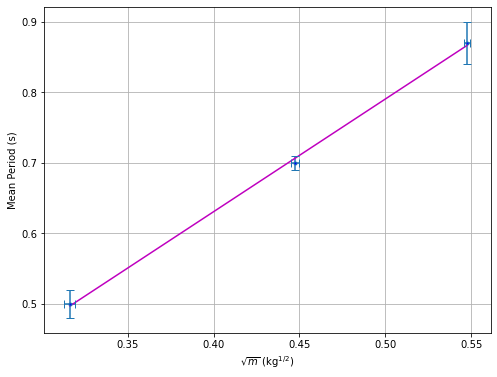

In [22]:
# Calculate points for the line determined by the curve-fit parameters
xfit = np.linspace(np.min(np.sqrt(m)),np.max(np.sqrt(m)),100) # dependent variable used for drawing a best-fit line
yfit = a*xfit + b # independent variable used for drawing a best-fit line

uncsqrtm = uncm/m*np.sqrt(m)

# Plot the best-fit line and the data on the same axes
fig = plt.figure(figsize=(8,6))
plt.title("")
plt.xlabel('$\sqrt{m}$ (kg$^{1/2}$)')
plt.ylabel('Mean Period (s)')
plt.plot(xfit, yfit, 'm-')
plt.errorbar(np.sqrt(m), Tmean, xerr=uncsqrtm, yerr=Tstd, marker='.', markerfacecolor='blue', markersize=6, capsize=4, ls='none')
plt.grid(which='both', axis='both')
plt.show()

## Calculate Spring Stiffness

Use the slope (variable `a` in the code) to calculate the stiffness of the spring, $k_s$. Your calculation should be in Python. For $\pi$, use `np.pi`.